# Semantic Similarity

In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter
import re
from bs4 import BeautifulSoup
import inspect

# Utilitiy Functions

In [48]:
def retrieve_name(var):
    callers_local_vars = globals().items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

def print_df_name():
    print(f" ")
    print(f" ")
    print(f"{retrieve_name(df)}")

# Reading Data

In [19]:
train = pd.read_csv( "./data/train.csv")
test_kragel = pd.read_csv( "./data/test.csv")

print(f"Train: {train.shape} Test_kragel: {test_kragel.shape}")

Train: (303214, 7) Test_kragel: (101073, 7)


## Dividing train data

In [20]:
div_ratio = 1/4
end = len(train)
test_len = int( np.ceil( end * div_ratio ) )
test = train[0:test_len]
train = train[test_len:end]

In [21]:
train

Unnamed: 0      id    qid1    qid2  \
75804       176878  176878  272041  272042   
75805       176879  176879  272043  153498   
75806       176880  176880  272044  272045   
75807       176881  176881   74990     467   
75808       176882  176882  272046  115151   
...            ...     ...     ...     ...   
303209      404285  404285  433578  379845   
303210      404286  404286   18840  155606   
303211      404287  404287  537928  537929   
303212      404288  404288  537930  537931   
303213      404289  404289  537932  537933   

                                                question1  \
75804       can you make objects appear on a spinning fan   
75805   where can i get custom solutions for built in ...   
75806                    what are some best home workouts   
75807              how did sunny leone become a porn star   
75808   if you could change one thing about the us wha...   
...                                                   ...   
303209  how many keywords are there in the racket prog...   
303210           do you believe there is life after death   
303211                                   what is one coin   
303212  what is the approx annual cost of living while...   
303213               what is like to have sex with cousin   

                                                question2  is_duplicate  
75804   how can railway improve local train by providi...             0  
75805   where can i get custom wardrobe solutions in s...             0  
75806                 what are the best home workout dvds             0  
75807                            do porn stars watch porn             0  
75808   if you could change one thing about the way yo...             0  
...                                                   ...           ...  
303209  how many keywords are there in perl programmin...             0  
303210          is it true that there is life after death             1  
303211                                  what is this coin             0  
303212  i am having little hairfall problem but i want...             0  
303213       what is it like to have sex with your cousin             0  

[227410 rows x 7 columns]

In [22]:
test

Unnamed: 0      id    qid1    qid2  \
0          101073  101073  167505  167506   
1          101074  101074  167507  167508   
2          101075  101075  167509  167510   
3          101076  101076  167511  167512   
4          101077  101077  167513  167514   
...           ...     ...     ...     ...   
75799      176873  176873  272034  272035   
75800      176874  176874  272036  272037   
75801      176875  176875   59388  272038   
75802      176876  176876  140581   24203   
75803      176877  176877  272039  272040   

                                               question1  \
0                         what do doctors think of dr oz   
1              how were dead end streets formed in india   
2       why do drugs inhibit the the activity of enzymes   
3                      why do not americans play cricket   
4      do astronauts smoke weed cigarettes or booze w...   
...                                                  ...   
75799                           where are white peacocks   
75800  who would win in a fight to the death grey wor...   
75801                       how can i build up my resume   
75802  how does trump s win affects indian students p...   
75803  what are the literary devices found in annabel...   

                                               question2  is_duplicate  
0                      what do physicians think of dr oz             1  
1      where does a dead body of a terrorist end up i...             0  
2                             does an enzyme have energy             0  
3                      why americans do not play cricket             1  
4           is it possible to smoke a cigarette in space             0  
...                                                  ...           ...  
75799                     where are white peacocks found             1  
75800            who would win in a duel bronn or oberyn             0  
75801                   how do you build a better resume             1  
75802  what does donald trump s win mean for indian s...             1  
75803     what are literary devices found in annabel lee             1  

[75804 rows x 7 columns]

In [23]:
test_kragel

Unnamed: 0      id    qid1    qid2  \
0                0       0       1       2   
1                1       1       3       4   
2                2       2       5       6   
3                3       3       7       8   
4                4       4       9      10   
...            ...     ...     ...     ...   
101068      101068  101068  167495  167496   
101069      101069  101069  167497  167498   
101070      101070  101070  167499  167500   
101071      101071  101071  167501  167502   
101072      101072  101072  167503  167504   

                                                question1  \
0       what is the step by step guide to invest in sh...   
1        what is the story of kohinoor koh i noor diamond   
2       how can i increase the speed of my internet co...   
3        why am i mentally very lonely how can i solve it   
4       which one dissolve in water quikly sugar salt ...   
...                                                   ...   
101068                 how does one improve rote learning   
101069  what does the b2b sales process look like in t...   
101070  what is the best face maintainance routine for...   
101071         how do i check a registered company in uae   
101072         how do you close a bank of america account   

                                                question2  is_duplicate  
0       what is the step by step guide to invest in sh...             0  
1       what would happen if the indian government sto...             0  
2       how can internet speed be increased by hacking...             0  
3       find the remainder when 23 24 math is divided ...             0  
4                  which fish would survive in salt water             0  
...                                                   ...           ...  
101068          how can i improve my rote learning skills             1  
101069  what does the b2b sales process look like in v...             0  
101070  what is the best face wash and face moisturize...             0  
101071      how do i register a company in uae free zones             0  
101072      can i close my bank of america account online             0  

[101073 rows x 7 columns]

In [24]:
print(f"Train: {train.shape} Test: {test.shape} Test_kragel: {test_kragel.shape}")

Train: (227410, 7) Test: (75804, 7) Test_kragel: (101073, 7)


# Data Preprocessing

## Sanitizing

In [33]:
def show_bad_enteries( df: pd.DataFrame ):
    print(f"------------------")
    print(f"Null enteries stats")
    print(f"{df.isnull().sum()}")
    print(f"--------")
    df[df.isnull()]

def drop_bad_enteries( df: pd.DataFrame ) -> pd.DataFrame:
    df.dropna( axis = 0, inplace = True )
    return df    

In [34]:
df = []
def sanitize_data():
    dfs = [ train, test, test_kragel ]

    for df in dfs:
        print_df_name()
        show_bad_enteries( df )
        print(f"Sanitizing")
        drop_bad_enteries(df)
        show_bad_enteries( df )
        
sanitize_data()    

 
 
['df']
------------------
Null enteries stats
Unnamed: 0       0
id               0
qid1             0
qid2             0
question1       10
question2        5
is_duplicate     0
dtype: int64
--------
Sanitizing
------------------
Null enteries stats
Unnamed: 0      0
id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64
--------
 
 
['df']
------------------
Null enteries stats
Unnamed: 0      0
id              0
qid1            0
qid2            0
question1       5
question2       4
is_duplicate    0
dtype: int64
--------
Sanitizing
------------------
Null enteries stats
Unnamed: 0      0
id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64
--------
 
 
['df']
------------------
Null enteries stats
Unnamed: 0     0
test_id        0
question1     32
question2     24
dtype: int64
--------
Sanitizing
------------------
Null enteries stats
Unnamed: 0 

## Visualizing

### Duplicates

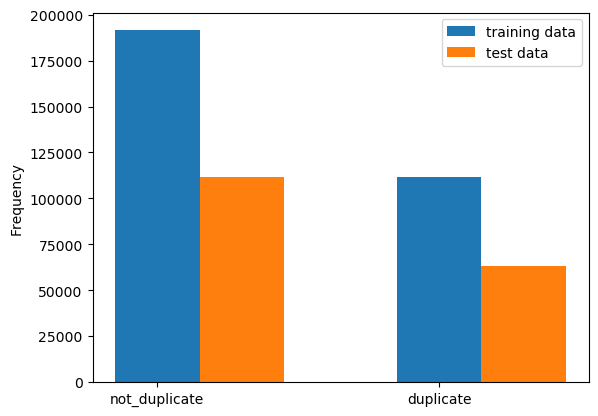

In [45]:
dfs = [ train, test ]
freqs = []
x = np.array([0,0.1])
for df in dfs:
    # print_df_name()
    counts = df['is_duplicate'].value_counts()
    freqs.append( counts[0] )
    freqs.append( counts[1] )

plt.close()

bwidth = 0.03
plt.bar( x, freqs[0:2], label='training data', width=bwidth )
plt.bar( x + bwidth, freqs[1:3], label='test data', width=bwidth )

plt.xticks( ticks=x, labels=['not_duplicate', 'duplicate'] )

plt.ylabel("Frequency")

plt.legend()
plt.show()    

### Unique Questions

In [31]:
def dump_unique_questions( df ):
    print_df_name()
    # Unique question ids in the dataset
    qid = pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
    print("No. of unique question ids : ", len(np.unique(qid)))
    # Duplicate question ids in the dataset
    x = pd.Series(df['qid1'].tolist()+df['qid2'].tolist()).value_counts()>1
    print("No. of repeated questions : ",x[x].shape[0])

    # duplicate question pairs 
    print("No. of duplicate question pairs : ",df.duplicated().sum())

dfs = [ train, test ]
for df in dfs:
    dump_unique_questions( df )

 
 
['train', 'df']
No. of unique question ids :  427061
No. of repeated questions :  79533
No. of duplicate question pairs :  0
 
 
['test', 'df']
No. of unique question ids :  167504
No. of repeated questions :  19724
No. of duplicate question pairs :  0


## Preprocessing

In [32]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    return q.lower()

def apply_preprocess( df ):
    df['question1'] = df['question1'].apply(preprocess)
    df['question2'] = df['question2'].apply(preprocess)

In [33]:
dfs = [ train, test, test_kragel ]

for df in dfs:
    apply_preprocess( df )

## Saving Preprocessed Data

In [37]:
dfs = [ train, test, test_kragel ]
paths = []
for df in dfs:
    base = "./data"
    name = retrieve_name( df )[0]
    paths.append(base+"/"+name+".csv")
    df.to_csv(paths[-1])
paths

['./data/___.csv', './data/__.csv', './data/_.csv']

## Restoring Preprocessed Data

In [14]:
paths = ['./data/train.csv', './data/test.csv', './data/test_kragel.csv']
dfs = []
for path in paths:
    dfs.append( pd.read_csv( path ) )

train = dfs[0]
test = dfs[1]
test_kragel = dfs[2]

sanitize_data()

NameError: name 'sanitize_data' is not defined

# Generating Word Embedding and Comparison to determine Semantic Similarity

## Generating Embeddings

### Context Free Embedding

#### Bag of Words

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfTransformer

In [77]:
%%time

strings = [ 
    "How can i build up my resume?",
    "How do you build a better resume?",
	"Why do drugs inhibit the the activity of enzymes?",
    "Does an enzyme have energy?"
]

cv = CountVectorizer()
model_wordbag = cv.fit( strings )
embd = model_wordbag.transform( strings )    
#embd = normalize( embd )
embd_array = embd.toarray()
similarity = [ cosine( embd_array[i], embd_array[i+1] ) for i in range(0,4,2) ]

transformer = TfidfTransformer(smooth_idf=False)
tfidf_array = transformer.fit_transform(embd_array)
tfidf_array = tfidf_array.toarray()
similarity_tfidf = [ cosine( tfidf_array[i], tfidf_array[i+1] ) for i in range(0,4,2) ]

embd_gue = embed( strings )
embd_gue = np.array( embd_gue )
similarity_gue = [ cosine( embd_gue[i], embd_gue[i+1] ) for i in range(0,4,2) ]
print("Embeddings from GUE shape: {}".format( embd_gue.shape) )

print( "Features: {}".format( cv.get_feature_names_out() ) )

for i,s in enumerate( strings ):
    print( s )
    print( embd_array[i] )
    def print_float( ary ):
        sf = " ".join( [ '%.1f' % f for f in ary ] )
        print( sf )
    print("TFIDF: ")
    print_float( tfidf_array[i] )

print( "BOW similarities: {}".format( similarity ) )
print( "TFIDF similarities: {}".format( similarity_tfidf ) )
print( "GUE similarities: {}".format( similarity_gue ) )

Embeddings from GUE shape: (4, 512)
Features: ['activity' 'an' 'better' 'build' 'can' 'do' 'does' 'drugs' 'energy'
 'enzyme' 'enzymes' 'have' 'how' 'inhibit' 'my' 'of' 'resume' 'the' 'up'
 'why' 'you']
How can i build up my resume?
[0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0]
TFIDF: 
0.0 0.0 0.0 0.3 0.5 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.3 0.0 0.5 0.0 0.3 0.0 0.5 0.0 0.0
How do you build a better resume?
[0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1]
TFIDF: 
0.0 0.0 0.5 0.4 0.0 0.4 0.0 0.0 0.0 0.0 0.0 0.0 0.4 0.0 0.0 0.0 0.4 0.0 0.0 0.0 0.5
Why do drugs inhibit the the activity of enzymes?
[1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 2 0 1 0]
TFIDF: 
0.3 0.0 0.0 0.0 0.0 0.2 0.0 0.3 0.0 0.0 0.3 0.0 0.0 0.3 0.0 0.3 0.0 0.6 0.0 0.3 0.0
Does an enzyme have energy?
[0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0]
TFIDF: 
0.0 0.4 0.0 0.0 0.0 0.0 0.4 0.0 0.4 0.4 0.0 0.4 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
BOW similarities: [0.5, 1.0]
TFIDF similarities: [0.6450346871422282, 1.0]
GUE similarities: [0.1984320878982544

In [72]:
%%time

# single array with question 1 and question 2
def join_questions( df ):
    return list(df['question1'].values.astype('U')) + list(df['question2'].values.astype('U'))

questions_train = join_questions( train )
questions_test = join_questions( test )
# questions_test_kragel = join_questions( test_kragel )

# questions_all = [ questions, questions_test, questions_test_kragel ]
questions_all = [ questions_train, questions_test]

CPU times: user 2.9 s, sys: 1.65 s, total: 4.55 s
Wall time: 4.51 s


In [78]:
%%time

embeddings_wordbag = []

cv = CountVectorizer()
model_wordbag = cv.fit( questions_train )

for questions in questions_all:
    embd = model_wordbag.transform( questions )    
    embd = normalize( embd )
    
    embeddings_wordbag.append( embd )
    
embeddings_wordbag

CPU times: user 22.7 s, sys: 316 ms, total: 23 s
Wall time: 23 s


[<606428x76068 sparse matrix of type '<class 'numpy.float64'>'
 	with 6120420 stored elements in Compressed Sparse Row format>,
 <202146x76068 sparse matrix of type '<class 'numpy.float64'>'
 	with 2023931 stored elements in Compressed Sparse Row format>]

In [49]:
questions = questions_all[0]
model_wordbag = embeddings_wordbag[0]

print(f"Number of questions: {len(questions)}")
print(f"Features {cv.get_feature_names_out()}")
print(f"first row {model_wordbag[0].toarray()} - len {len(model_wordbag[0].toarray()[0])}")
print(f"Sparse Matrix Dimensions {model_wordbag.shape}")

Number of questions: 606398
Features ['00' '000' '0002' ... '하지만' '한글' 'ﬁnd']
first row [[0. 0. 0. ... 0. 0. 0.]] - len 76066
Sparse Matrix Dimensions (606398, 76066)


#### TF-IDF - Term Frequency - Inverse Document Frequency

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [79]:
%%time 

embeddings_tfidf = []
 
tfidf = TfidfVectorizer(smooth_idf=False)
model_tfidf = tfidf.fit( questions_train )

for questions in questions_all:
    embd = model_tfidf.transform( questions )
    
    embeddings_tfidf.append( embd )
    
embeddings_tfidf

CPU times: user 22.9 s, sys: 264 ms, total: 23.1 s
Wall time: 23.1 s


[<606428x76068 sparse matrix of type '<class 'numpy.float64'>'
 	with 6120420 stored elements in Compressed Sparse Row format>,
 <202146x76068 sparse matrix of type '<class 'numpy.float64'>'
 	with 2023931 stored elements in Compressed Sparse Row format>]

### Google Universal Encoder

In [ ]:
from absl import logging
import matplotlib.pyplot as plt

import tensorflow as tf

import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

import tensorflow_hub as hub

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

%%time

embeddings_gue = []

for questions in questions_all:
    embd = embed(questions)
    embeddings_gue.append( embd )
 
embeddings_gue


### Transformer Based

#### Sentence Transformer Deep Learning Model all-MiniLM-L6-v2
> https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2

In [80]:
from sentence_transformers import SentenceTransformer

In [81]:
%%time

model = SentenceTransformer('all-MiniLM-L6-v2')

embeddings_transformer = []

for questions in questions_all:
    embd = model.encode(questions)
    embeddings_transformer.append( embd )
 
embeddings_transformer

2022-12-05 17:02:27 - Load pretrained SentenceTransformer: all-MiniLM-L6-v2



2022-12-05 17:02:33 - Use pytorch device: cpu


KeyboardInterrupt: 

In [82]:
embeddings_transformer = [ np.matrix( embd ) for embd in embeddings_transformer ]

## Visualizing Embeddings

### TruncatedSVD Dimension Reduction 

In [84]:
from sklearn.decomposition import TruncatedSVD

In [85]:
%%time 

gen_2d = True
#embeddings = [ embeddings_wordbag[0], embeddings_tfidf[0], embeddings_transformer[0], embeddings_gue[0] ]
embeddings = [ embeddings_wordbag[0], embeddings_tfidf[0],  embeddings_gue[0] ]
reduced = []

for embd in embeddings:
    if gen_2d:
        tsvd = TruncatedSVD(n_components=2)
    else:
        tsvd = TruncatedSVD(n_components=3)
    tsvd.fit( embd )
    reduced_q = tsvd.transform( embd )
    reduced.append( reduced_q )

CPU times: user 5min 8s, sys: 8min 11s, total: 13min 20s
Wall time: 24.7 s


In [68]:
print(reduced[0])
print(reduced[1])

[[ 0.31464742  0.07288571 -0.13828335]
 [ 0.14307234  0.29689035  0.0029249 ]
 [ 0.43630143  0.07133372 -0.23108352]
 ...
 [ 0.46145481 -0.21092157  0.32181957]
 [ 0.14130498  0.04702    -0.0096807 ]
 [ 0.41324664 -0.06769286  0.28753598]]
[[ 0.10659507  0.02524758  0.09946729]
 [ 0.07720197  0.0594002  -0.03463904]
 [ 0.13996984 -0.00101703  0.05767514]
 ...
 [ 0.13044434 -0.07717267 -0.04094003]
 [ 0.09490402  0.0153608  -0.02023568]
 [ 0.23222076 -0.01235086 -0.06260473]]


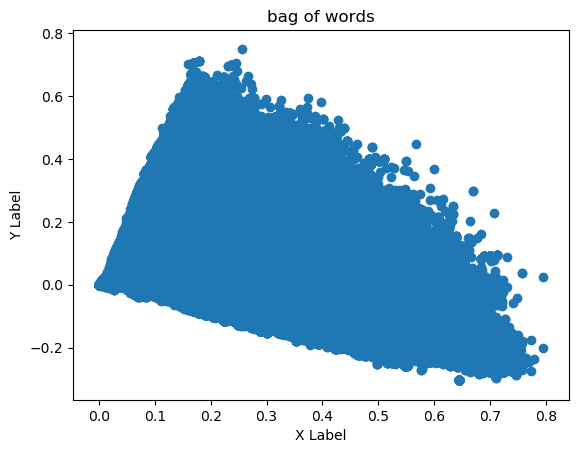

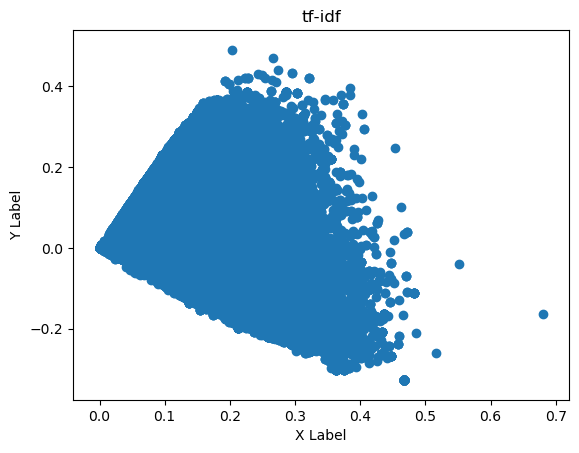

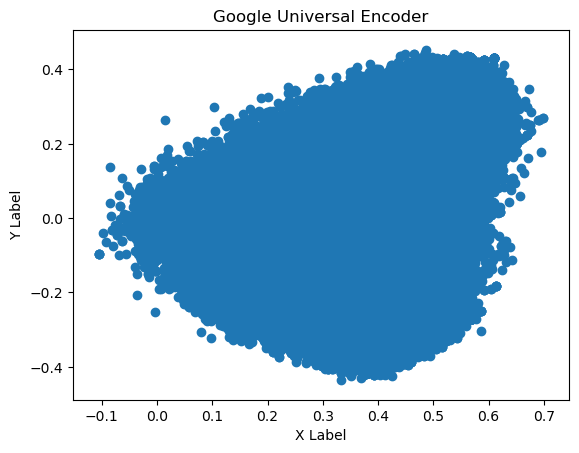

CPU times: user 25.9 s, sys: 1.15 s, total: 27 s
Wall time: 26.2 s


In [86]:
%%time 

def plot_reduced( reduced_q ):
    n = zip(*reduced_q)

    fig = plt.figure()
    if gen_2d:
        ax = fig.add_subplot()
        ax.scatter( next(n), next(n) )
    else: 
        ax = fig.add_subplot(projection='3d')
        ax.scatter( next(n), next(n), next(n) )

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    if not gen_2d:
        ax.set_zlabel('Z Label')
    
    plt.title( name )
    plt.show()

#names = [ 'bag of words', 'tf-idf', 'transformer' ]
names = [ 'bag of words', 'tf-idf', 'Google Universal Encoder' ]
for i,reduced_v in enumerate(reduced):
    name = names[i]
    plot_reduced( reduced_v )

## Spliting and Stacking Embeddings

In [125]:
from scipy.sparse import hstack as shstack
from scipy.sparse import spmatrix
from numpy import hstack

In [121]:
temp = embeddings_transformer[0]
length = temp.shape[0]//2
end = temp.shape[0]
temp = temp[length:,]
temp.shape

(303214, 384)

In [109]:
temp = embeddings_wordbag[0]
temp[0:3,]

<3x76068 sparse matrix of type '<class 'numpy.float64'>'
	with 23 stored elements in Compressed Sparse Row format>

In [126]:
def split_join_vectors( model ):
    length = model.shape[0]//2
    q1_array = model[:length,]
    q2_array = model[length:,]
    if isinstance( q1_array, spmatrix ): 
        q_array = shstack( (q1_array, q2_array) )
    else:
        q_array = hstack( (q1_array, q2_array) )
    return q_array

embeddings = embeddings_wordbag + embeddings_tfidf + embeddings_transformer
embeddings_stacked = []

for embd in embeddings:
    x = split_join_vectors( embd )
    embeddings_stacked.append( x )

embeddings_stacked[0].shape

(303214, 152136)

In [128]:
y_train = train['is_duplicate']
y_test = test['is_duplicate']

## Comparing Embeddings to Determine Similarity

In [ ]:
b = 0
#      wordbag train            tdidf train   
xs = [ embeddings_stacked[0+b], embeddings_stacked[2+b], embeddings_stacked[4+b] ]

b = 1
#      wordbag test             tdidf test
ts = [ embeddings_stacked[0+b], embeddings_stacked[2+b], embeddings_stacked[4+b] ]

### Logistic Regression

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [134]:
%%time 

accuracies = []


for i,x in enumerate(xs):
    lr = LogisticRegression()
    lr.fit(x, y_array)
    y_pred = lr.predict(ts[i])
    a = accuracy_score(y_test, y_pred)
    accuracies.append(a)

print(accuracies)

/home/abrehman/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/abrehman/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

[0.7501211995290532, 0.7562850612923333, 0.7109712781850741]
CPU times: user 4min 30s, sys: 2min 8s, total: 6min 38s
Wall time: 34.2 s


/home/abrehman/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/abrehman/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


### Random Forest Classifier

In [87]:
from sklearn.ensemble import RandomForestClassifier 

In [135]:
%%time 

accuracies_rf = []

for i,x in enumerate(xs):
    rf = RandomForestClassifier(n_jobs=-1)
    rf.fit(x, y_array)
    y_pred = rf.predict(ts[i])
    a = accuracy_score(y_test,y_pred)
    accuracies_rf.append(a)

print(accuracies_rf)

/home/abrehman/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/home/abrehman/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


[0.8104439365607037, 0.8102856351350014, 0.8165979044848772]
CPU times: user 7h 36min 27s, sys: 16.7 s, total: 7h 36min 44s
Wall time: 38min 53s


### Cosine Similarity

In [51]:
from scipy.spatial.distance import cosine

In [169]:
%%time 

accuracies_cos = []

def cos_similarity( xs ):
    ys = []
    print(xs.shape)
    for i in range(0,xs.shape[0]):
        x = xs[i,]
        if isinstance( x, spmatrix ):
            x = x.toarray()[0]
        else:
            x = np.asarray( x )
            x = x[0]
        
        length =x.shape[0]//2;
        x0 = x[0:length,]
        x1 = x[length:,]
        
        y = cosine( x0, x1 )
        y = 0 if y >= 0.5 else 1 
        ys.append( y )
    
    return ys

for i,x in enumerate(xs):
    y_pred = cos_similarity(ts[i])
    a = accuracy_score(y_test,y_pred)
    accuracies_cos.append(a)


print(accuracies_cos)



(101073, 152136)


/home/abrehman/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


(101073, 152136)


/home/abrehman/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


(101073, 768)
[0.6580194512876831, 0.6570597488943635, 0.6051467751031433]
CPU times: user 39 s, sys: 61 µs, total: 39 s
Wall time: 39 s


# Transformer Training and Prediction

## Using BERT all-MiniLM-L6-v2

https://github.com/UKPLab/sentence-transformers/blob/master/examples/training/sts/training_stsbenchmark.py

In [ ]:
from sentence_transformers import SentenceTransformer,  LoggingHandler, losses, models, util
from sentence_transformers.evaluation import EmbeddingSimilarityEvaluator
from sentence_transformers.readers import InputExample

#You can specify any huggingface/transformers pre-trained model here, for example, bert-base-uncased, roberta-base, xlm-roberta-base

# Read the dataset
train_batch_size = 16
num_epochs = 4
model_save_path = 'output/training_'+model_name.replace("/", "-")+'-'+datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
model_save_path = 'output/training_sentence-transformers-all-MiniLM-L6-v2-2022-12-04_15-24-08'
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_name = "sentence-transformers/all-MiniLM-L6-v2"
word_embedding_model = models.Transformer(model_name)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension(),
                               pooling_mode_mean_tokens=True,
                               pooling_mode_cls_token=False,
                               pooling_mode_max_tokens=False)
model = SentenceTransformer(modules=[word_embedding_model, pooling_model], device=device)

train_loss = losses.CosineSimilarityLoss(model=model)
evaluator = EmbeddingSimilarityEvaluator.from_input_examples(dev_samples, name='data-dev')

model.fit(train_objectives=[(train_dataloader, train_loss)],
          evaluator=evaluator,
          epochs=num_epochs,
          evaluation_steps=1000,
          warmup_steps=warmup_steps,
          output_path=model_save_path)

In [88]:
import torch
from torch.utils.data import DataLoader
import math
from sentence_transformers import SentenceTransformer,  LoggingHandler, losses, models, util
from sentence_transformers.evaluation import EmbeddingSimilarityEvaluator
from sentence_transformers.readers import InputExample
import logging
from datetime import datetime
import sys
import os
import gzip
import csv

### Configuration

In [89]:
#### Just some code to print debug information to stdout
logging.basicConfig(format='%(asctime)s - %(message)s',
                    datefmt='%Y-%m-%d %H:%M:%S',
                    level=logging.INFO,
                    handlers=[LoggingHandler()])

In [96]:
#You can specify any huggingface/transformers pre-trained model here, for example, bert-base-uncased, roberta-base, xlm-roberta-base
model_name = "sentence-transformers/all-MiniLM-L6-v2"

# Read the dataset
train_batch_size = 16
num_epochs = 4
model_save_path = 'output/training_'+model_name.replace("/", "-")+'-'+datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
model_save_path = 'output/training_sentence-transformers-all-MiniLM-L6-v2-2022-12-04_15-24-08'
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Building Model

In [91]:
# Use Huggingface/transformers model (like BERT, RoBERTa, XLNet, XLM-R) for mapping tokens to embeddings
word_embedding_model = models.Transformer(model_name)

# Apply mean pooling to get one fixed sized sentence vector
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension(),
                               pooling_mode_mean_tokens=True,
                               pooling_mode_cls_token=False,
                               pooling_mode_max_tokens=False)

model = SentenceTransformer(modules=[word_embedding_model, pooling_model], device=device)

### Load Data

In [92]:
train_samples = []
dev_samples = []
test_samples = []
str_samples = []

def df_to_samples( df ):
    samples = []
    
    df = df.dropna()
    for i,r in df.iterrows():
        inp_example = InputExample(texts=[r['question1'], r['question2']], label=float(r['is_duplicate']))
        
        def check_for_float( t ): 
            if isinstance( r[t], float ):
                print( r[t] )
        
        check_for_float('question1')
        check_for_float('question2')
        samples.append( inp_example )
        
    return samples 

train_samples = df_to_samples( train )
dev_samples = df_to_samples( test )

train_dataloader = DataLoader(train_samples, shuffle=True, batch_size=train_batch_size)
dev_dataloader = DataLoader(dev_samples, shuffle=True, batch_size=train_batch_size)

print( train_dataloader )
print( dev_dataloader )

### Loss and Evaluator

In [93]:
train_loss = losses.CosineSimilarityLoss(model=model)

logging.info("Read dev dataset")
evaluator = EmbeddingSimilarityEvaluator.from_input_examples(dev_samples, name='data-dev')

2022-12-05 21:00:40 - Read dev dataset


### Config Training

In [94]:
# Configure the training. We skip evaluation in this example
warmup_steps = math.ceil(len(train_dataloader) * num_epochs  * 0.1) #10% of train data for warm-up
logging.info("Warmup-steps: {}".format(warmup_steps))

2022-12-05 21:00:40 - Warmup-steps: 7580


### Train

In [41]:
# Train the model
model.fit(train_objectives=[(train_dataloader, train_loss)],
          evaluator=evaluator,
          epochs=num_epochs,
          evaluation_steps=1000,
          warmup_steps=warmup_steps,
          output_path=model_save_path)

KeyboardInterrupt: 

In [38]:
evaluator( model )

2022-12-04 14:09:20 - EmbeddingSimilarityEvaluator: Evaluating the model on data-dev dataset:
2022-12-04 14:13:45 - Cosine-Similarity :	Pearson: 0.5915	Spearman: 0.6129
2022-12-04 14:13:45 - Manhattan-Distance:	Pearson: 0.5455	Spearman: 0.5554
2022-12-04 14:13:45 - Euclidean-Distance:	Pearson: 0.5462	Spearman: 0.5559
2022-12-04 14:13:45 - Dot-Product-Similarity:	Pearson: 0.5176	Spearman: 0.5341


0.6128769297992597

In [98]:
print(test_samples[1])

IndexError: list index out of range

### Testing Trained Model

In [99]:
model = SentenceTransformer(model_save_path)
test_evaluator = EmbeddingSimilarityEvaluator.from_input_examples(dev_samples, name='test')
test_evaluator(model, output_path=model_save_path)

2022-12-05 21:33:51 - Load pretrained SentenceTransformer: output/training_sentence-transformers-all-MiniLM-L6-v2-2022-12-04_15-24-08
2022-12-05 21:33:51 - Use pytorch device: cpu
2022-12-05 21:33:51 - EmbeddingSimilarityEvaluator: Evaluating the model on test dataset:
2022-12-05 21:38:24 - Cosine-Similarity :	Pearson: 0.7665	Spearman: 0.7380
2022-12-05 21:38:24 - Manhattan-Distance:	Pearson: 0.6529	Spearman: 0.6540
2022-12-05 21:38:24 - Euclidean-Distance:	Pearson: 0.6530	Spearman: 0.6540
2022-12-05 21:38:24 - Dot-Product-Similarity:	Pearson: 0.6960	Spearman: 0.7106


0.7379839993358688

In [122]:
strings = [ 'How can i build up my resume'
           ,'How do you build a better resume'
           ,'Why do drugs inhibit the the activity of enzymes'
           ,'Does an enzyme have energy']
strings = [ s.lower() for s in strings ]
print( strings )

r = model.encode( strings )
similarity_transformer = [ cosine( r[i], r[i+1] ) for i in range(0,4,2) ]
print( similarity_transformer )

['how can i build up my resume', 'how do you build a better resume', 'why do drugs inhibit the the activity of enzymes', 'does an enzyme have energy']



[0.05082213878631592, 0.8089432418346405]


In [121]:
r[0].shape

(384,)

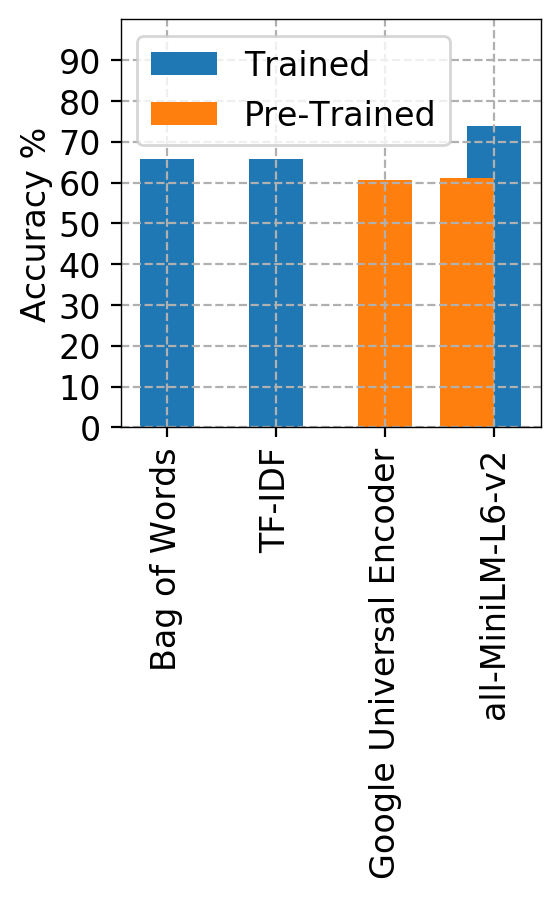

In [168]:
import matplotlib

matplotlib.rcParams.update({'font.size': 12})
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = 'Helvetica'
matplotlib.rcParams['lines.linewidth'] = 0.5
matplotlib.rcParams["pdf.use14corefonts"] = True
matplotlib.rcParams['axes.linewidth'] = 0.5
matplotlib.rcParams['axes.labelpad'] = 2.0
matplotlib.rcParams['axes.titlepad'] = 2.0
matplotlib.rcParams['figure.dpi'] = 200.0
matplotlib.rcParams['figure.subplot.left'] = 0.2
matplotlib.rcParams['figure.subplot.bottom'] = 0.2


accuracies_pt = [ 0.0, 0.0, 0.0, 0.612 ]
accuracies = [ 0.6580194512876831, 0.6570597488943635,  0.7379839993358688 ]
accuracies = [ a * 100 for a in accuracies ]
accuracies_pt = [ a * 100 for a in accuracies_pt ]
methods = [ 'Bag of Words', 'TF-IDF', 'Google Universal Encoder', 'all-MiniLM-L6-v2' ]
x = [ 1, 2, 4 ]

plt.close()
fig, ax = plt.subplots(figsize=(3, 3))

plt.bar( x, accuracies, width=0.5, color='tab:blue', label='Trained' )

a_pt = [ 0.6051467751031433*100, accuracies_pt[3] ]
x_pt = [ 3, 3+0.75 ]
plt.bar( x_pt, a_pt, width=0.5, color='tab:orange', label='Pre-Trained' )

x = [ 1, 2, 3, 4 ]
plt.xticks( x, methods, rotation=90 )
plt.yticks( range(0,100,10) )
plt.ylabel( 'Accuracy %' )
plt.ylim( bottom=0,top=100 )
plt.grid(linestyle='--')
plt.legend()
plt.show()

## Random Preprocessing

In [218]:
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

In [282]:
class MLPreprocessing:
    
    def __init__(self, data):
        self.data = data
        self.max_len = 1200 # empirical determined max len of a sentence in given dataset is 1140
        self.max_words = 76068 # same as the sparse mat generated using bag of words
        
    def load_data(self):
        self.q1 = list(self.data['question1'])
        self.q2 = list(self.data['question2'])
        self.y  = list(self.data['is_duplicate'])
        
    def prepare_tokens(self):
        self.tokens = Tokenizer(num_words=self.max_words)
        self.tokens.fit_on_texts(self.q1)
        self.tokens.fit_on_texts(self.q2)

    def texts_to_sequences(self, x):
        sequences = self.tokens.texts_to_sequences(x)
        return pad_sequences(sequences, maxlen=self.max_len)

In [283]:
prep = MLPreprocessing( train )
prep.load_data()

prep.prepare_tokens()

In [285]:
prep.q1_seq = prep.texts_to_sequences( prep.q1 ) 
prep.q2_seq = prep.texts_to_sequences( prep.q2 ) 

In [289]:
print( prep.q1_seq.shape )
print( prep.q2_seq.shape )

(303199, 1200)
(303199, 1200)


In [281]:
strings = [ "this is a sentence", 
            "it is a collection of words",
            "the quick brown fox jumped over the lazy dog"]
print( strings )

tokens = Tokenizer( num_words=100 )
tokens.fit_on_texts( strings )

seq = tokens.texts_to_sequences( strings )
print(seq)

seq = pad_sequences( seq, maxlen=10 )
print(seq)

['this is a sentence', 'it is a collection of words', 'the quick brown fox jumped over the lazy dog']
[[4, 1, 2, 5], [6, 1, 2, 7, 8, 9], [3, 10, 11, 12, 13, 14, 3, 15, 16]]
[[ 0  0  0  0  0  0  4  1  2  5]
 [ 0  0  0  0  6  1  2  7  8  9]
 [ 0  3 10 11 12 13 14  3 15 16]]


In [267]:
def lenquestion( q ):
    return len(q)

def lenq1( row ):
    return lenquestion(row['question1'])

def lenq2( row ):
    return lenquestion(row['question2'])

train['q1_len'] = train.apply( lenq1, axis=1 )
train['q2_len'] = train.apply( lenq2, axis=1 )
maxq1_len = max( train['q1_len'] )
maxq2_len = max( train['q2_len'] )
print(maxq1_len)
print(maxq2_len)
print(len(train['q1_len']))

430
1140
303199


# References

1. https://www.kaggle.com/code/neelkamal692/bow-tfidf-with-preprocessing/notebook